## Twitter
**Big Data & AI - Final Project**

Team:
- Raúl Cárdenas
- Luisa Toro
- Thomas Werner
- Aman Kumar


### I. Project Overview

**Problem Statement:** What makes a tweet viral? Is it possible to classify a tweet as viral or not based on its metadata? How can this information be leveraged to unlock new ways of monetization for users and increase the value proposition of Twitter Blue?

### II. Data Collection

In [1]:
# import pandas and load df
import pandas as pd
tweets = pd.read_json("random_tweets.json", lines=True)

### III. Exploratory Analysis

In [ ]:
# Explore df
print(tweets.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11099 entries, 0 to 11098
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype              
---  ------                     --------------  -----              
 0   created_at                 11099 non-null  datetime64[ns, UTC]
 1   id                         11099 non-null  int64              
 2   id_str                     11099 non-null  int64              
 3   text                       11099 non-null  object             
 4   truncated                  11099 non-null  bool               
 5   entities                   11099 non-null  object             
 6   metadata                   11099 non-null  object             
 7   source                     11099 non-null  object             
 8   in_reply_to_status_id      1402 non-null   float64            
 9   in_reply_to_status_id_str  1402 non-null   float64            
 10  in_reply_to_user_id        1503 non-null   float64            
 11  in

In [ ]:
# Explore df
print(tweets.iloc[0])

created_at                                           2018-07-31 13:34:40+00:00
id                                                         1024287229525598210
id_str                                                     1024287229525598208
text                         RT @KWWLStormTrack7: We are more than a month ...
truncated                                                                False
entities                     {'hashtags': [], 'symbols': [], 'user_mentions...
metadata                     {'iso_language_code': 'en', 'result_type': 're...
source                       <a href="http://twitter.com/download/android" ...
in_reply_to_status_id                                                      NaN
in_reply_to_status_id_str                                                  NaN
in_reply_to_user_id                                                        NaN
in_reply_to_user_id_str                                                    NaN
in_reply_to_screen_name                             

In [ ]:
# Explore df
print(tweets.columns)

Index(['created_at', 'id', 'id_str', 'text', 'truncated', 'entities',
       'metadata', 'source', 'in_reply_to_status_id',
       'in_reply_to_status_id_str', 'in_reply_to_user_id',
       'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo',
       'coordinates', 'place', 'contributors', 'retweeted_status',
       'is_quote_status', 'retweet_count', 'favorite_count', 'favorited',
       'retweeted', 'lang', 'possibly_sensitive', 'quoted_status_id',
       'quoted_status_id_str', 'extended_entities', 'quoted_status',
       'withheld_in_countries'],
      dtype='object')


In [ ]:
# Explore text column
print(tweets["text"].iloc[40])

LinkFest ~ Best Reads on Writing, Screenwriting &amp; Self-Publishing: The Door In The Floor #selfpublishing #writing  https://t.co/MoKWmzSw0r


In [ ]:
# Explore user column
print(tweets.user.iloc[0])

{'id': 145388018, 'id_str': '145388018', 'name': 'Derek Wolkenhauer', 'screen_name': 'derekw221', 'location': 'Waterloo, Iowa', 'description': '', 'url': None, 'entities': {'description': {'urls': []}}, 'protected': False, 'followers_count': 215, 'friends_count': 335, 'listed_count': 2, 'created_at': 'Tue May 18 21:30:10 +0000 2010', 'favourites_count': 3419, 'utc_offset': None, 'time_zone': None, 'geo_enabled': True, 'verified': False, 'statuses_count': 4475, 'lang': 'en', 'contributors_enabled': False, 'is_translator': False, 'is_translation_enabled': False, 'profile_background_color': '022330', 'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme15/bg.png', 'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme15/bg.png', 'profile_background_tile': False, 'profile_image_url': 'http://pbs.twimg.com/profile_images/995790590276243456/cgxRVviN_normal.jpg', 'profile_image_url_https': 'https://pbs.twimg.com/profile_images/995790590276243456/c

In [ ]:
# Explore entities column
print(tweets.entities.iloc[11096])


{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'ChrisDanicic', 'name': 'Chris Danicic', 'id': 774299495790108672, 'id_str': '774299495790108672', 'indices': [0, 13]}, {'screen_name': 'Mediaite', 'name': 'Mediaite', 'id': 29465136, 'id_str': '29465136', 'indices': [14, 23]}, {'screen_name': 'benshapiro', 'name': 'Ben Shapiro', 'id': 17995040, 'id_str': '17995040', 'indices': [24, 35]}], 'urls': [{'url': 'https://t.co/PAByGjQsvw', 'expanded_url': 'https://twitter.com/i/web/status/1024287114459074560', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [117, 140]}]}


In [ ]:
# Explore metadata column
print(tweets.metadata.iloc[0])
tweets["metadata"].apply(lambda tweet: tweet["iso_language_code"]).unique()

{'iso_language_code': 'en', 'result_type': 'recent'}


array(['en', 'tl', 'ja', 'fi', 'ko', 'und', 'nl', 'es', 'pt', 'in', 'ur',
       'vi', 'it', 'th', 'ca', 'fr', 'ru', 'el', 'ar', 'pl', 'ro', 'tr',
       'sl', 'de', 'zh', 'fa', 'sv', 'et', 'hi', 'ht'], dtype=object)

In [ ]:
# Explore rewteeted status column
print(tweets.retweeted_status.iloc[0])

{'created_at': 'Mon Jul 30 16:49:41 +0000 2018', 'id': 1023973918959382528, 'id_str': '1023973918959382528', 'text': 'We are more than a month into summer but the days are getting shorter. The sunrise is about 25 minutes later on Jul… https://t.co/fEfTJIfrA7', 'truncated': True, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/fEfTJIfrA7', 'expanded_url': 'https://twitter.com/i/web/status/1023973918959382528', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [117, 140]}]}, 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'}, 'source': '<a href="http://www.socialnewsdesk.com" rel="nofollow">SocialNewsDesk</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 131864835, 'id_str': '131864835', 'name': 'KWWL Storm Track 7', 'screen_name': 'KWWLStormTrack7', 'location': 'Waterloo, IA', 'description

In [ ]:
# Check for missing data
tweets.isnull().sum()

created_at                       0
id                               0
id_str                           0
text                             0
truncated                        0
entities                         0
metadata                         0
source                           0
in_reply_to_status_id         9697
in_reply_to_status_id_str     9697
in_reply_to_user_id           9596
in_reply_to_user_id_str       9596
in_reply_to_screen_name       9596
user                             0
geo                          11082
coordinates                  11082
place                        10943
contributors                 11099
retweeted_status              3727
is_quote_status                  0
retweet_count                    0
favorite_count                   0
favorited                        0
retweeted                        0
lang                             0
possibly_sensitive            7907
quoted_status_id              9945
quoted_status_id_str          9945
extended_entities   

### IV. Feature Engineering

In [3]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import pipeline

count     11099.000000
mean       2777.956392
std       12180.169923
min           0.000000
25%           0.000000
50%          13.000000
75%         428.500000
max      413719.000000
Name: retweet_count, dtype: float64


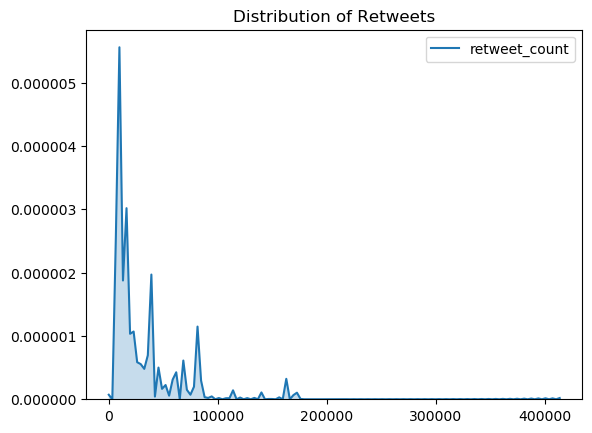

In [4]:
# What makes a tweet viral? Median retweets, mean retweets, retweets over time, etc.?
print(tweets["retweet_count"].describe())
ax = plt.subplot()
sns.kdeplot(tweets["retweet_count"], shade=True)
plt.title("Distribution of Retweets")
plt.show()

In [ ]:
# Create target column to classify tweets as viral or non-viral based on the number of retweets
# Median
median_retweets = tweets["retweet_count"].median()
print("Median Retweets: {}".format(median_retweets))
tweets["is_viral"] = np.where(tweets["retweet_count"] >= median_retweets, 1, 0)
print(tweets["is_viral"].value_counts())

Median Retweets: 13.0
1    5591
0    5508
Name: is_viral, dtype: int64


In [ ]:
# Create target column to classify tweets as viral or non-viral based on the number of retweets (method 2)
# Everything above Q3
retweet_threshold = 428
tweets["is_viral"] = np.where(tweets["retweet_count"] >= retweet_threshold, 1, 0)
print(tweets["is_viral"].value_counts())

Median Retweets: 13.0
0    8322
1    2777
Name: is_viral, dtype: int64


In [ ]:
# Explore datetime metadata
# Extract dates from created_at 
tweets["created_at"] = tweets.apply(lambda tweet: tweet["user"]["created_at"], axis=1)
print(tweets.created_at.iloc[0])
# Convert to datetime
from datetime import datetime
tweets["created_at"] = tweets.apply(lambda tweet: datetime.strptime(tweet["created_at"], "%a %b %d %H:%M:%S %z %Y"), axis=1)
# Extract year, month, day, time, and day of week
tweets["year"] = tweets.apply(lambda tweet: tweet["created_at"].year, axis=1)
tweets["month"] = tweets.apply(lambda tweet: tweet["created_at"].month, axis=1)
tweets["day"] = tweets.apply(lambda tweet: tweet["created_at"].day, axis=1)
tweets["time"] = tweets.apply(lambda tweet: tweet["created_at"].time(), axis=1)
tweets["day_of_week"] = tweets.apply(lambda tweet: tweet["created_at"].weekday(), axis=1)
print(tweets[["created_at", "year", "month", "day", "time", "day_of_week"]].iloc[0])

Tue May 18 21:30:10 +0000 2010
created_at     2010-05-18 21:30:10+00:00
year                                2010
month                                  5
day                                   18
time                            21:30:10
day_of_week                            1
Name: 0, dtype: object


In [ ]:
# How many years are covered in the dataset?
print(np.sort(tweets.year.unique()))
print("\ntotal number of years: {}\n".format(len(tweets.year.unique())))
# How many tweets per year?
print("Numer of tweets per year:")
tweets_per_year = tweets.groupby("year").size()
print(tweets_per_year)
# Retweets over time
tweets.groupby(["created_at"]).retweet_count.sum()



[2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018]

total number of years: 13

Numer of tweets per year:
year
2006       2
2007      34
2008     227
2009    1158
2010     864
2011    1182
2012    1128
2013     972
2014     888
2015     867
2016    1068
2017    1404
2018    1305
dtype: int64


created_at
2006-11-21 18:15:42+00:00      0
2006-11-29 01:51:08+00:00      1
2007-01-01 08:15:11+00:00     99
2007-01-10 01:35:12+00:00      0
2007-01-31 23:14:07+00:00     14
                            ... 
2018-07-31 13:26:52+00:00     75
2018-07-31 13:27:33+00:00    238
2018-07-31 13:28:43+00:00    177
2018-07-31 13:29:34+00:00    131
2018-07-31 13:29:46+00:00      2
Name: retweet_count, Length: 10400, dtype: int64

In [ ]:
print(tweets.user.iloc[0])

{'id': 145388018, 'id_str': '145388018', 'name': 'Derek Wolkenhauer', 'screen_name': 'derekw221', 'location': 'Waterloo, Iowa', 'description': '', 'url': None, 'entities': {'description': {'urls': []}}, 'protected': False, 'followers_count': 215, 'friends_count': 335, 'listed_count': 2, 'created_at': 'Tue May 18 21:30:10 +0000 2010', 'favourites_count': 3419, 'utc_offset': None, 'time_zone': None, 'geo_enabled': True, 'verified': False, 'statuses_count': 4475, 'lang': 'en', 'contributors_enabled': False, 'is_translator': False, 'is_translation_enabled': False, 'profile_background_color': '022330', 'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme15/bg.png', 'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme15/bg.png', 'profile_background_tile': False, 'profile_image_url': 'http://pbs.twimg.com/profile_images/995790590276243456/cgxRVviN_normal.jpg', 'profile_image_url_https': 'https://pbs.twimg.com/profile_images/995790590276243456/c

In [ ]:
# Create new feature columns that might help us determine whether a tweet is viral or not
# Length of tweet
tweets["tweet_length"] = tweets.apply(lambda tweet: len(tweet["text"]), axis=1)
# Extract followers count from user column
tweets["followers_count"] = tweets.apply(lambda tweet: tweet["user"]["followers_count"], axis=1)
# Extract friends count from user column
tweets["friends_count"] = tweets.apply(lambda tweet: tweet["user"]["friends_count"], axis=1)
# Extract favourite count from user column
tweets["favourites_count"] = tweets.apply(lambda tweet: tweet["user"]["favourites_count"], axis=1)
# Extract verified status from user column
tweets["verified"] = tweets.apply(lambda tweet: tweet["user"]["verified"], axis=1)
# Extract language from metadata column
tweets["language"] = tweets.apply(lambda tweet: tweet["metadata"]["iso_language_code"], axis=1)
# Extract number of hashtags from text column
tweets["hashtags_count"] = tweets.apply(lambda tweet: tweet["text"].count("#"), axis=1)
# Extract number of words in text column
tweets["words_count"] = tweets.apply(lambda tweet: len(tweet["text"].strip().split(" ")), axis=1)

In [ ]:
# Perform sentiment analysis on tweets
sentiment_pipeline = pipeline("sentiment-analysis")
tweets = (
    tweets
    .assign(sentiment = lambda x: x["text"].apply(lambda tweet: sentiment_pipeline(tweet)))
    .assign(
         label = lambda x: x["sentiment"].apply(lambda s: (s[0]["label"])),
         score = lambda x: x["sentiment"].apply(lambda s: (s[0]["score"]))
    )
)
print(tweets[["text", "sentiment", "label", "score"]].iloc[0:5])

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


                                                text  \
0  RT @KWWLStormTrack7: We are more than a month ...   
1  @hail_ee23 Thanks love its just the feeling of...   
2  RT @TransMediaWatch: Pink News has more on the...   
3  RT @realDonaldTrump: One of the reasons we nee...   
4  RT @First5App: This hearing of His Word doesn’...   

                                           sentiment     label     score  
0  [{'label': 'NEGATIVE', 'score': 0.974782645702...  NEGATIVE  0.974783  
1  [{'label': 'POSITIVE', 'score': 0.998418807983...  POSITIVE  0.998419  
2  [{'label': 'NEGATIVE', 'score': 0.997975289821...  NEGATIVE  0.997975  
3  [{'label': 'NEGATIVE', 'score': 0.943356394767...  NEGATIVE  0.943356  
4  [{'label': 'NEGATIVE', 'score': 0.992612719535...  NEGATIVE  0.992613  


In [ ]:
# Save dataframe to json file
tweets.to_json("random_tweets_fe.json")

In [3]:
# Import dataframe from checkpoint
tweets = pd.read_json("random_tweets_fe.json")

In [4]:
# Create label and feature columns
labels = tweets["is_viral"]
features = tweets[["tweet_length","followers_count","friends_count", "favourites_count", "verified", "language", "hashtags_count", "words_count", "month", "day_of_week", "label"]]

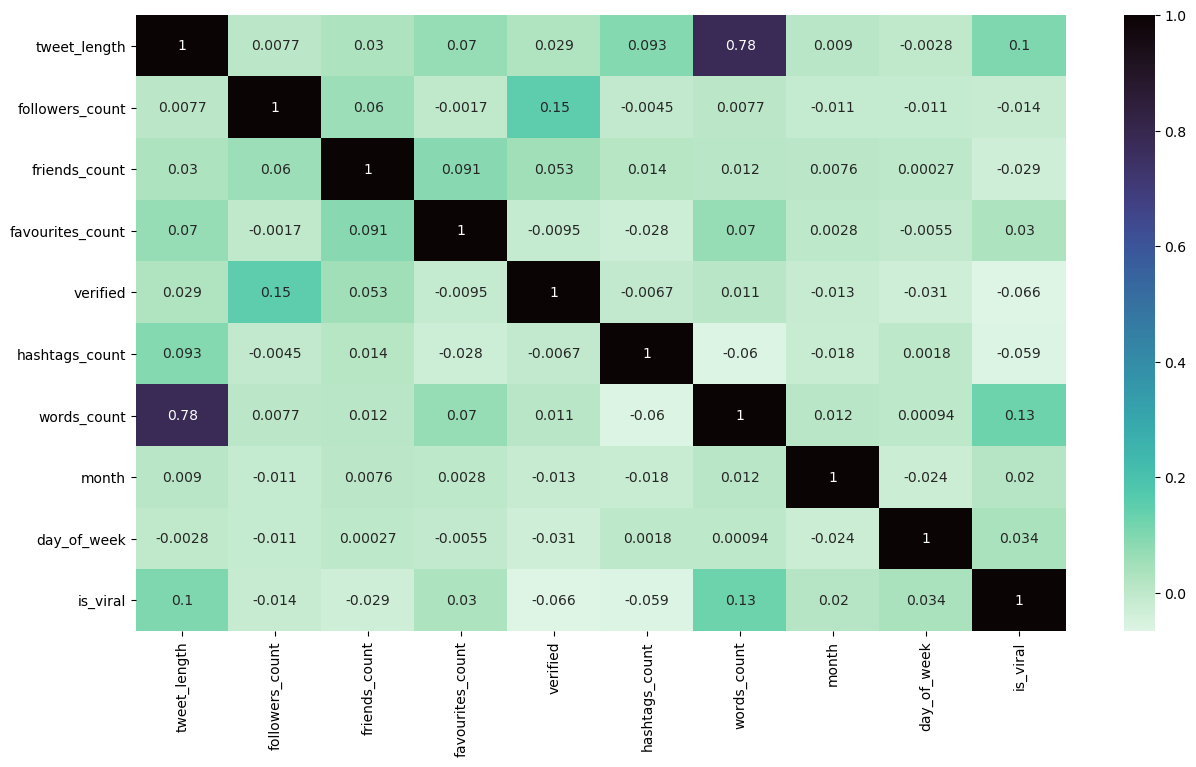

In [5]:
# Create correlation matrix with new df
temp_df = tweets[["tweet_length","followers_count","friends_count", "favourites_count", "verified", "language", "hashtags_count", "words_count", "month", "day_of_week", "label", "is_viral"]]
corr = temp_df.corr(method="pearson")
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True, cmap="mako_r")

In [7]:
# Dummy encode categorical features
features = pd.get_dummies(features, columns=["verified", "language", "month", "day_of_week", "label"], drop_first=True)

### V. Modelling

In [8]:
# import libraries
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve 
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.inspection import permutation_importance
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# Split training and test sets
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size = 0.20, random_state = 1)

In [10]:
# Oversampling to correct data imbalance
ovs = RandomOverSampler(random_state=42)
x_res, y_res = ovs.fit_resample(x_train, y_train)

In [11]:
# Print before and after oversampling
print("Original dataset shape {}".format(Counter(labels)))
print("Resampled dataset shape {}".format(Counter(y_res)))


Original dataset shape Counter({0: 8322, 1: 2777})
Resampled dataset shape Counter({0: 6646, 1: 6646})


#### Random Forests

In [12]:
# Set parameters for parameter optimization
param_grid = {"n_estimators": [100,200,300,500], "max_depth" : [4,7,10,15]}

In [13]:
# Run optimizer
cv_grid = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=5)
cv_grid.fit(x_res, y_res)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [4, 7, 10, 15],
                         'n_estimators': [100, 200, 300, 500]})

In [14]:
# print best parameters
cv_grid.best_params_

{'max_depth': 15, 'n_estimators': 300}

In [15]:
rf = cv_grid.best_estimator_
print(rf)

RandomForestClassifier(max_depth=15, n_estimators=300)


In [16]:
# Predictions
rf_predictions = rf.predict(x_test)

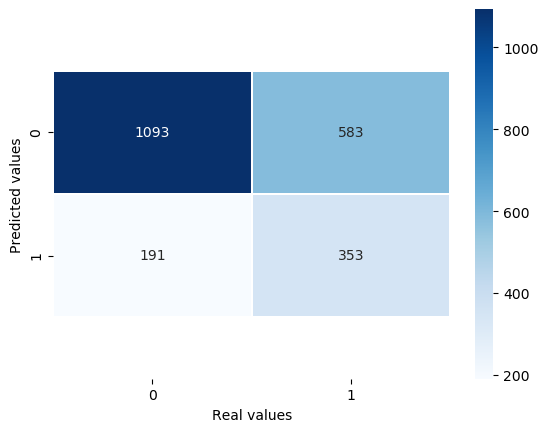

In [17]:
# Confusion Matrix
cm = confusion_matrix(y_test, rf_predictions)
ax = sns.heatmap(cm, linewidth = 0.5, annot = True, cmap = "Blues", fmt = "g") 
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.ylabel("Predicted values")
plt.xlabel("Real values")
plt.show()

In [18]:
# Model score
print("Train Score: ", rf.score(x_res, y_res))
print("Test Score: ", rf.score(x_test, y_test))

Train Score:  0.857508275654529
Test Score:  0.6513513513513514


In [19]:
# Classification Report
print(classification_report(y_test, rf_predictions))
# Precision: Out of all tweets that were predicted to be viral, how many were actually viral?
# Recall: Out of all tweets that are viral, how many were predicted to be viral?
# Accuracy: Total number of correct predictions out of all predictions

              precision    recall  f1-score   support

           0       0.85      0.65      0.74      1676
           1       0.38      0.65      0.48       544

    accuracy                           0.65      2220
   macro avg       0.61      0.65      0.61      2220
weighted avg       0.74      0.65      0.67      2220



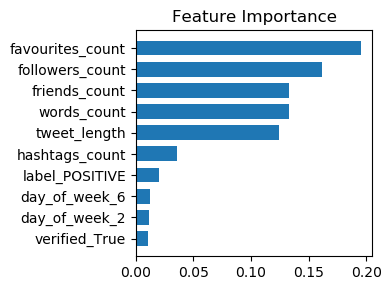

In [20]:
# Permutation importance
"""
result = permutation_importance(rf, x_train, y_train, n_repeats=10, random_state=0)
perm_sorted_idx = result.importances_mean.argsort()[-10:]
"""
# Feature importance
tree_importance_sorted_idx = np.argsort(rf.feature_importances_)[-10:][::-1]
tree_indices = (np.arange(0, len(rf.feature_importances_)) + 0.5)[-10:][::-1]

# Graph of feature importance
fig, ax1 = plt.subplots(1, 1, figsize=(4, 3))
ax1.barh(tree_indices, rf.feature_importances_[tree_importance_sorted_idx], height=0.7)
ax1.set_yticks(tree_indices)
ax1.set_yticklabels(features.columns[tree_importance_sorted_idx])
ax1.set_title("Feature Importance")
#ax1.set_ylim((0, len(rf.feature_importances_)))
"""
ax2.boxplot(
    result.importances[perm_sorted_idx].T,
    vert=False,
    labels=features.columns[perm_sorted_idx],
)
"""
fig.tight_layout()
plt.show()

#### K-Neighbors

In [21]:
# Determine the optimal number of neighbors
scores = []
for k in range(1,201,25):
    knn_pipe = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors = k))
    knn_pipe.fit(x_res, y_res)
    scores.append(knn_pipe.score(x_test, y_test))

In [22]:
max(scores)
scores.index(max(scores))+1

1

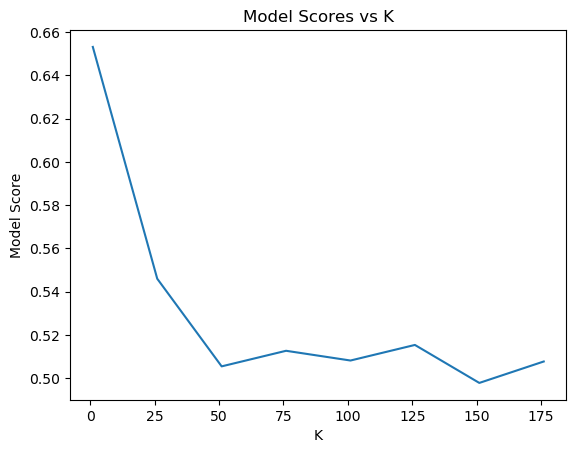

In [23]:
# Plot scores when k varies
ax = plt.subplot()   
plt.plot(range(1,201,25), scores)
ax.set_title("Model Scores vs K")
plt.ylabel("Model Score")
plt.xlabel("K")
# wrap text in x axis
plt.show()

In [24]:
# Create and train the model with pipeline
knn_pipe = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors = 100))
knn_pipe.fit(x_res, y_res)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier',
                 KNeighborsClassifier(n_neighbors=100))])

In [25]:
# Predictions
knn_predictions = knn_pipe.predict(x_test)

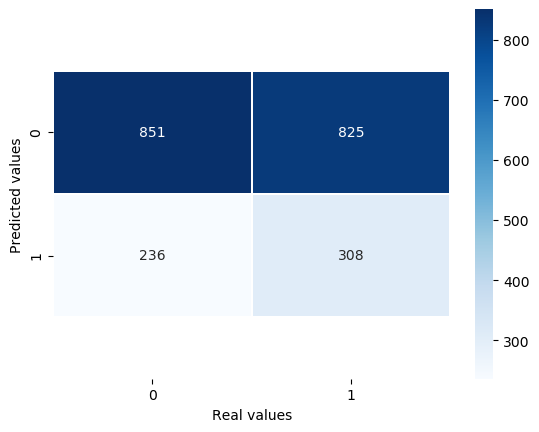

In [26]:
# Confusion Matrix
cm = confusion_matrix(y_test, knn_predictions)
ax = sns.heatmap(cm, linewidth = 0.5, annot = True, cmap = "Blues", fmt = "g") 
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.ylabel("Predicted values")
plt.xlabel("Real values")
plt.show()

In [27]:
# Model score
print("Train Score: ", knn_pipe.score(x_res, y_res))
print("Test Score: ", knn_pipe.score(x_test, y_test))

Train Score:  0.5868943725549203
Test Score:  0.5220720720720721


In [28]:
# Classification Report
print(classification_report(y_test, knn_predictions))

              precision    recall  f1-score   support

           0       0.78      0.51      0.62      1676
           1       0.27      0.57      0.37       544

    accuracy                           0.52      2220
   macro avg       0.53      0.54      0.49      2220
weighted avg       0.66      0.52      0.56      2220



#### Logistic Regression

In [29]:
# Create and train the model with pipeline
lr_pipe = make_pipeline(StandardScaler(), LogisticRegression())
lr_pipe.fit(x_res, y_res)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [30]:
# Predictions
lr_predictions = lr_pipe.predict(x_test)

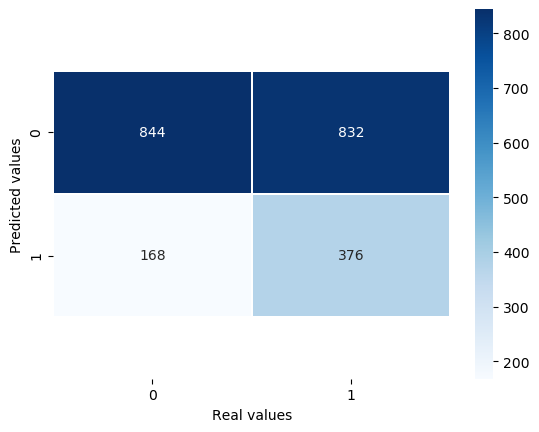

In [31]:
# Confusion Matrix
cm = confusion_matrix(y_test, lr_predictions)
ax = sns.heatmap(cm, linewidth = 0.5, annot = True, cmap = "Blues", fmt = "g") 
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.ylabel("Predicted values")
plt.xlabel("Real values")
plt.show()

In [32]:
# Model score
print("Train Score: ", lr_pipe.score(x_res, y_res))
print("Test Score: ", lr_pipe.score(x_test, y_test))

Train Score:  0.5941919951850737
Test Score:  0.5495495495495496


In [33]:
# Classification Report
print(classification_report(y_test, lr_predictions))

              precision    recall  f1-score   support

           0       0.83      0.50      0.63      1676
           1       0.31      0.69      0.43       544

    accuracy                           0.55      2220
   macro avg       0.57      0.60      0.53      2220
weighted avg       0.71      0.55      0.58      2220

